<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/Carvao_China_ANN_abril_14_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
%matplotlib inline

In [ ]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [ ]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [ ]:
#path="/home/ucfilho/Documents/Aulas/ANN_2018/Out_10_2018"
#os.chdir(path)
!git clone https://github.com/ucfilho/ANN
%cd ANN

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN


In [ ]:
DAT=pd.read_csv("Paper_Carvao_China_abril_12_2016.csv")
print(DAT.head())

   Unnamed: 0 Cod  Water    Ash  Volatil   FixC  NetCal  Carbon  Hydrog  \
0           1  LL   4.19  19.45    33.19  43.17   23.91   59.22    4.08   
1           2  YY   1.06  20.46    31.53  46.94   23.91   64.22    4.63   
2           3  SF   6.60   9.56    31.49  52.35   26.22   66.34    3.61   
3           4  YM   9.47  14.19    30.02  46.32   23.80   58.44    2.92   
4           5  ZZ   1.84  18.10    29.43  50.63   27.73   65.88    4.06   

   Nitro  Sulfur  Oxygen   TC     Ea  
0   1.02    4.38    7.66  435  170.1  
1   1.38    0.74    7.51  451  206.6  
2   0.95    0.38   12.56  431  273.5  
3   0.83    0.44   13.71  403  160.8  
4   1.22    0.88    8.02  466  228.4  


In [ ]:
# separa as colunas de interesse
Index=range(2,7)
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Water    Ash  Volatil   FixC  NetCal
0   4.19  19.45    33.19  43.17   23.91
1   1.06  20.46    31.53  46.94   23.91
2   6.60   9.56    31.49  52.35   26.22
3   9.47  14.19    30.02  46.32   23.80
4   1.84  18.10    29.43  50.63   27.73


In [ ]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [ ]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
print(train.head())
Col_Indep=['Water', 'Ash', 'Volatil', 'FixC']
print(test.head())
print("=======================")
print(test.shape[0])
print(test.shape[1])
print(train.shape[0])
print(train.shape[1])
print("=======================")

       Water       Ash   Volatil      FixC    NetCal
40 -0.792208 -0.412134  0.369356  0.133208  0.397849
32 -0.404959  0.420502  0.154700 -0.367730 -0.555004
57 -0.317591 -0.278243 -0.019985  0.193715  0.073615
15 -0.145218 -0.260809 -1.000000  0.770638  0.376344
60 -0.782763 -0.232915 -0.009623  0.250938  0.248966
       Water       Ash   Volatil      FixC    NetCal
0  -0.246753 -0.310321  1.000000 -0.443246 -0.114971
3   1.000000 -0.677127  0.765359 -0.295497 -0.133168
9  -0.645809 -0.661088  0.472243  0.206379  0.685691
28 -0.641086 -0.129707  0.272391 -0.025328  0.010753
29 -0.579693  0.059275  0.330126 -0.201220 -0.124897
13
5
51
5


In [ ]:
# obtem as variaveis independentes (treino e teste)
x_train=train[Col_Indep]
x_test=test[Col_Indep]
X_OLD=DAT_OLD[Col_Indep]
print(x_test.head())
print("=======================")
print(x_train.shape[0])
print(x_train.shape[1])
print(x_test.shape[0])
print(x_test.shape[1])
print("=======================")

       Water       Ash   Volatil      FixC
0  -0.246753 -0.310321  1.000000 -0.443246
3   1.000000 -0.677127  0.765359 -0.295497
9  -0.645809 -0.661088  0.472243  0.206379
28 -0.641086 -0.129707  0.272391 -0.025328
29 -0.579693  0.059275  0.330126 -0.201220
51
4
13
4


In [ ]:
# obtem as variaveis dependentes (treino e teste)
Index=[ 'NetCal']
y_train=train[Index]
y_test=test[Index]
Y_OLD=DAT_OLD[Index]
print(Y_OLD.head())
print(x_train.head())
print(y_test.head())
print("=======================")
print(y_train.shape[0])
print(y_train.shape[1])
print(y_test.shape[0])
print(y_test.shape[1])
print("=======================")

   NetCal
0   23.91
1   23.91
2   26.22
3   23.80
4   27.73
       Water       Ash   Volatil      FixC
40 -0.792208 -0.412134  0.369356  0.133208
32 -0.404959  0.420502  0.154700 -0.367730
57 -0.317591 -0.278243 -0.019985  0.193715
15 -0.145218 -0.260809 -1.000000  0.770638
60 -0.782763 -0.232915 -0.009623  0.250938
      NetCal
0  -0.114971
3  -0.133168
9   0.685691
28  0.010753
29 -0.124897
51
1
13
1


In [ ]:
# define a rede neural 
N_Hidden=10
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)

In [ ]:
# treina a rede neural
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [ ]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)
#print(y_calc_train)
#print(Y_OLD)

In [ ]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [ ]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
y_test=Original(y_test,Y_OLD)
y_train=Original(y_train,Y_OLD)
#print(y_calc_train)
#print(y_test)
#print(y_calc_test)
#print(Y_OLD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


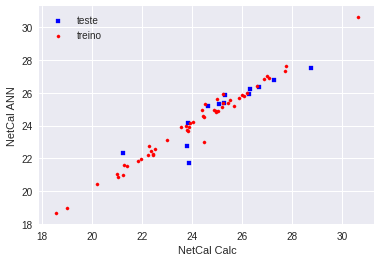

In [ ]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test.values,y_calc_test.values, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train.values,y_calc_train.values, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('NetCal ANN')
plt.xlabel('NetCal Calc')
plt.show()

In [ ]:
def function(x):
  global clf
  x=x.reshape((1, 4))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [ ]:
bounds = [(-2, 2),(-2, 2),(-2, 2),(-2, 2)]
OLD=Y_OLD
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, 4))
print(Condicoes)

     0    1    2    3
0 -2.0 -2.0  2.0  2.0


In [ ]:
print("hello world,I am evolving!!!")

hello world,I am evolving!!!
